In [70]:
#Import required library
import os 
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [71]:
#set working directory
os.chdir('D:\\Advance House Price Prediction')
warnings.filterwarnings(action="ignore")

In [72]:
#Read data house price csv data
df_house_price=pd.read_csv('houseprice.csv')
pd.options.display.max_rows=df_house_price.shape[0]
pd.options.display.max_columns=df_house_price.shape[1]

In [73]:
#check data
df_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


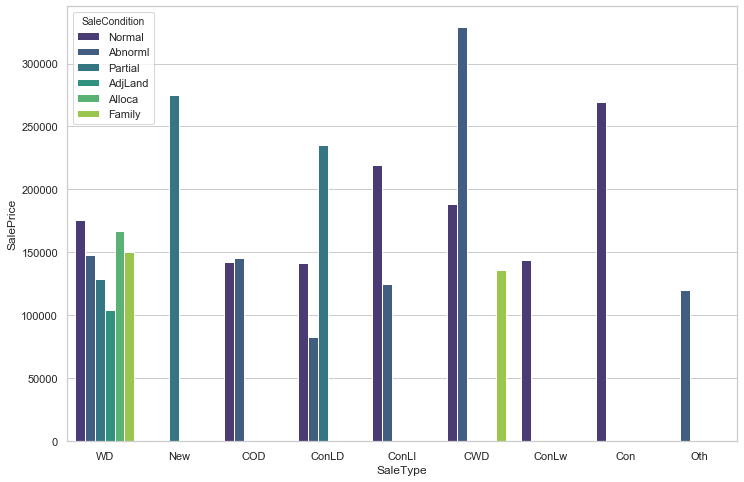

In [74]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1, palette= "viridis")
sns.set_style("whitegrid") 
sns.barplot(x=df_house_price.SaleType,y=df_house_price.SalePrice,ci=None,hue=df_house_price.SaleCondition)
plt.show()

<Figure size 1080x864 with 0 Axes>

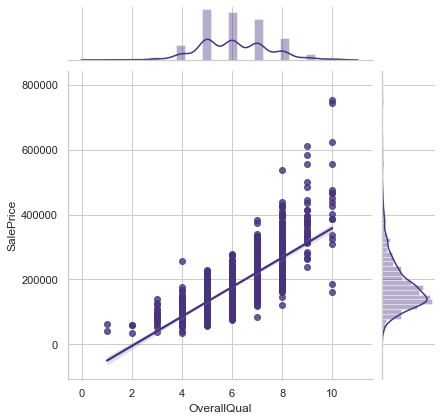

In [75]:
plt.figure(figsize=(15,12))
sns.set(font_scale=1, palette= "viridis")
sns.set_style("whitegrid") 
sns.jointplot(x=df_house_price.OverallQual,y=df_house_price.SalePrice,data=df_house_price,kind="reg")
plt.show()

<Figure size 1080x864 with 0 Axes>

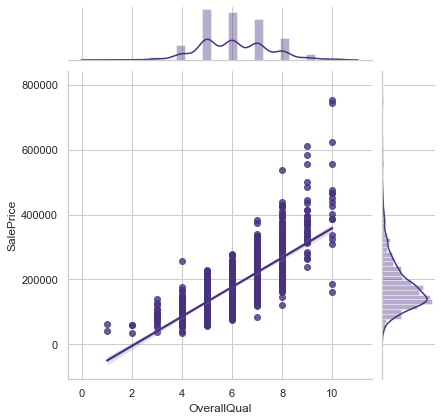

In [76]:
plt.figure(figsize=(15,12))
sns.set(font_scale=1, palette= "viridis")
sns.set_style("whitegrid") 
sns.jointplot(x=df_house_price.OverallQual,y=df_house_price.SalePrice,data=df_house_price,kind="reg")
plt.show()

In [77]:
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [78]:
#Check shape
df_house_price.shape

(1460, 81)

## Exploratory Data Analysis

In [79]:
class Exploratory_Data_Analysis():
    def __init__(self,df_data):
        self.df_data=df_data
    def missing_visualization(self,cols):
        plt.figure(figsize=(12,8))
        sns.set(font_scale=1, palette= "viridis")
        sns.set_style("whitegrid") 
        sns.heatmap(self.df_data[cols].isnull(),fmt="",cbar=False,vmin=0,vmax=1,center=0,cmap="RdYlGn")
        plt.show()
    def Distribution_plot(self,cols):
        for col in cols:
            plt.figure(figsize=(12,8))
            sns.set(font_scale=1, palette= "viridis")
            sns.set_style("whitegrid") 
            sns.distplot(self.df_data[col])
            plt.axvline(np.mean(self.df_data[col]),color='k',linestyle='dashed',linewidth=5)
            _,max_=plt.ylim()
            plt.text(self.df_data[col].mean()+self.df_data[col].mean()/10,max_-max_/10,"mean: {:,.2f}".format(self.df_data[col].mean()))
            plt.title(col)
            plt.ylabel('Values')
            plt.show()
    def heat_map_Viz(self,cols):
        plt.figure(figsize=(12,8))
        sns.set(font_scale=1, palette= "viridis")
        sns.set_style("whitegrid") 
        ax=sns.heatmap(self.df_data[cols].corr(),annot = True,center=0,annot_kws={"size": 10})
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
        plt.show()
    def pair_plot_Viz(self,cols):
        plt.figure(figsize=(12,8))
        sns.set(font_scale=1, palette= "viridis")
        sns.set_style("whitegrid") 
        sns.pairplot(data=df_house_price[cols])
        plt.show()

In [80]:
EDA=Exploratory_Data_Analysis(df_house_price)

In [81]:
cols=['SalePrice','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt']

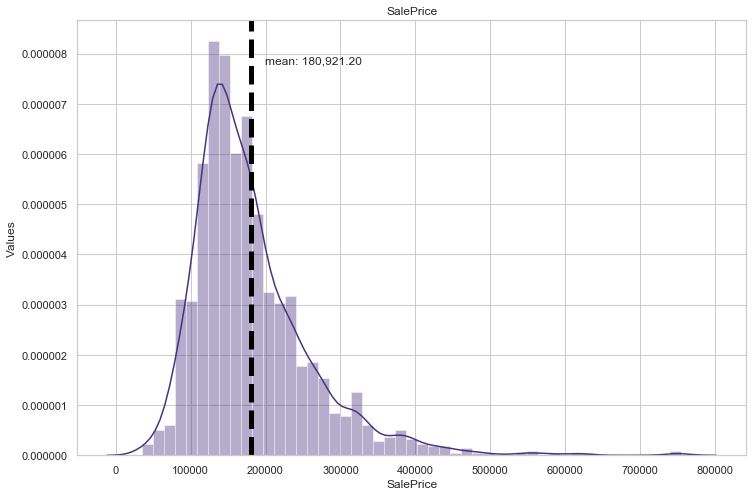

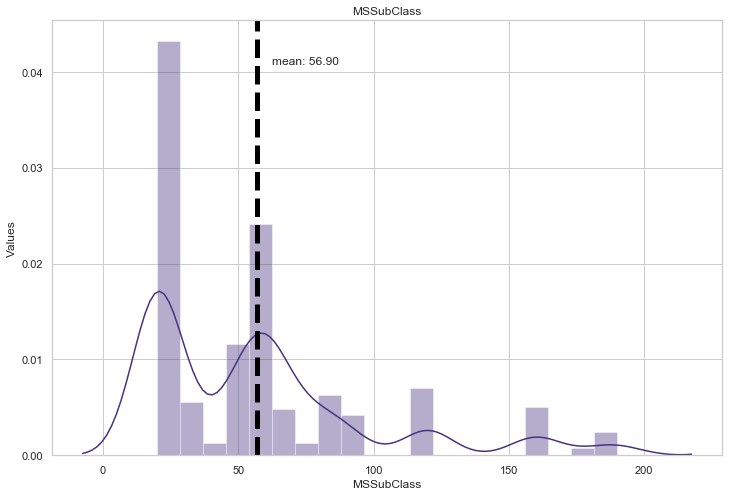

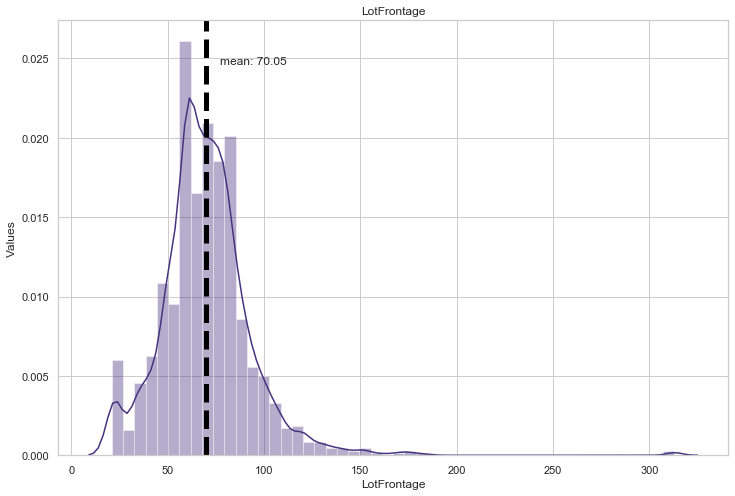

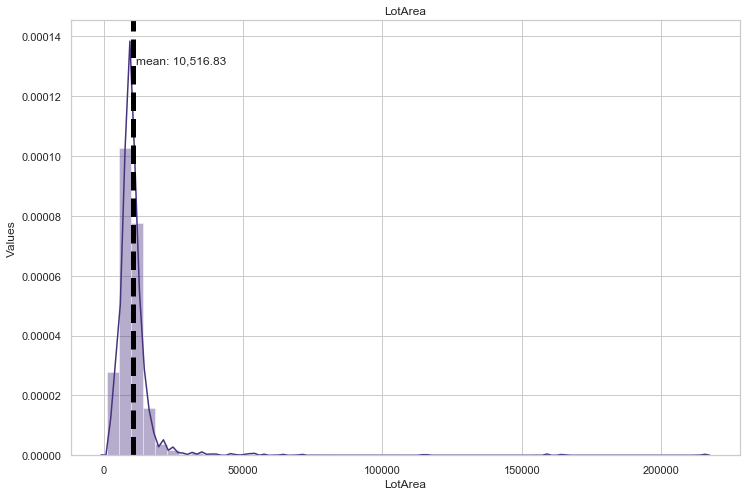

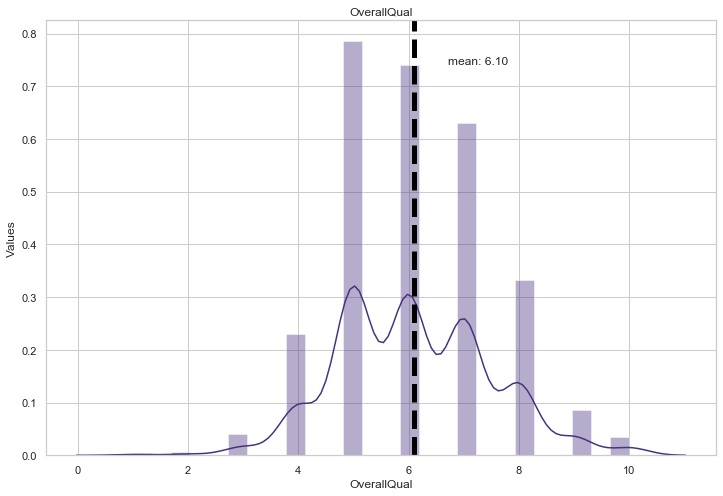

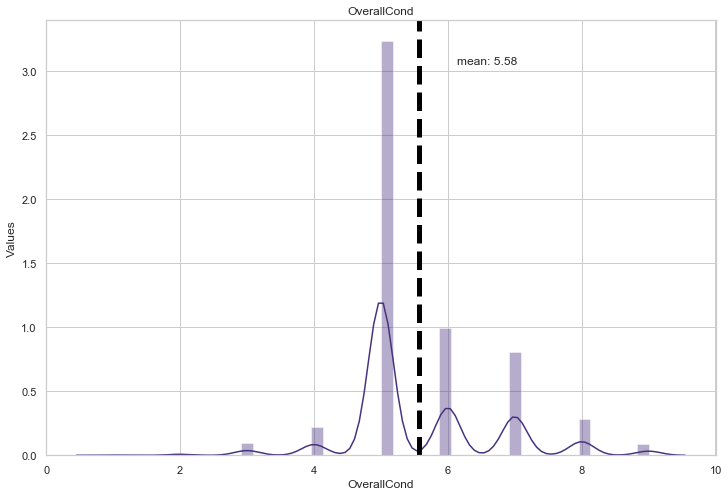

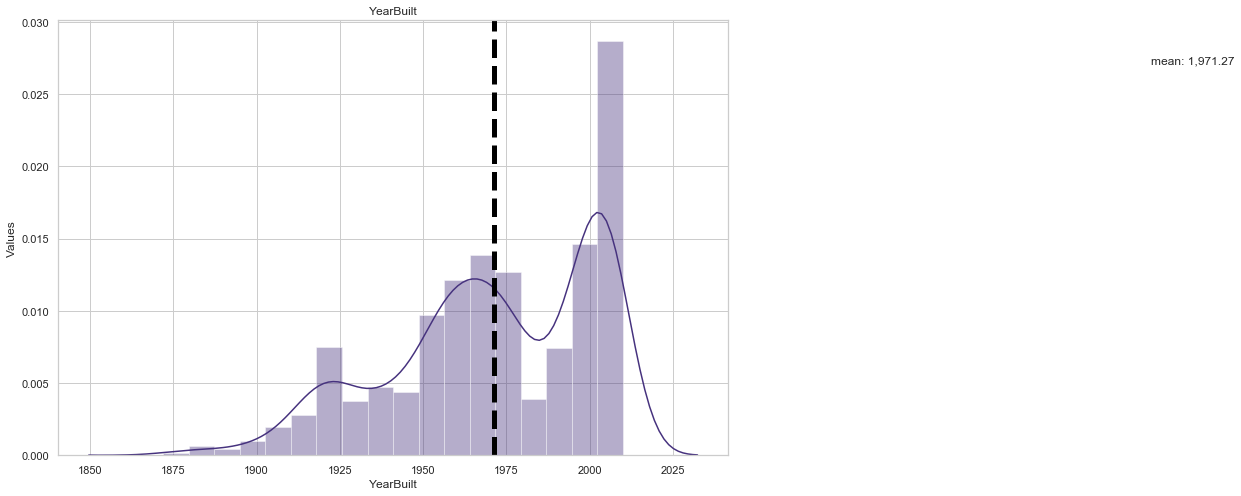

In [82]:
EDA.Distribution_plot(cols)

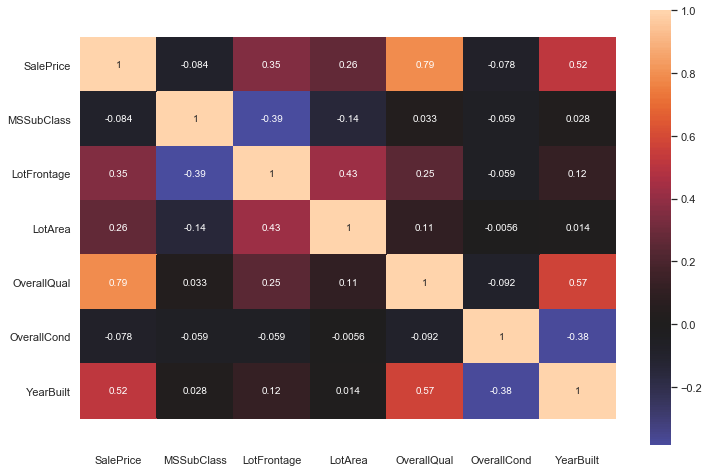

In [83]:
EDA.heat_map_Viz(cols)

<Figure size 864x576 with 0 Axes>

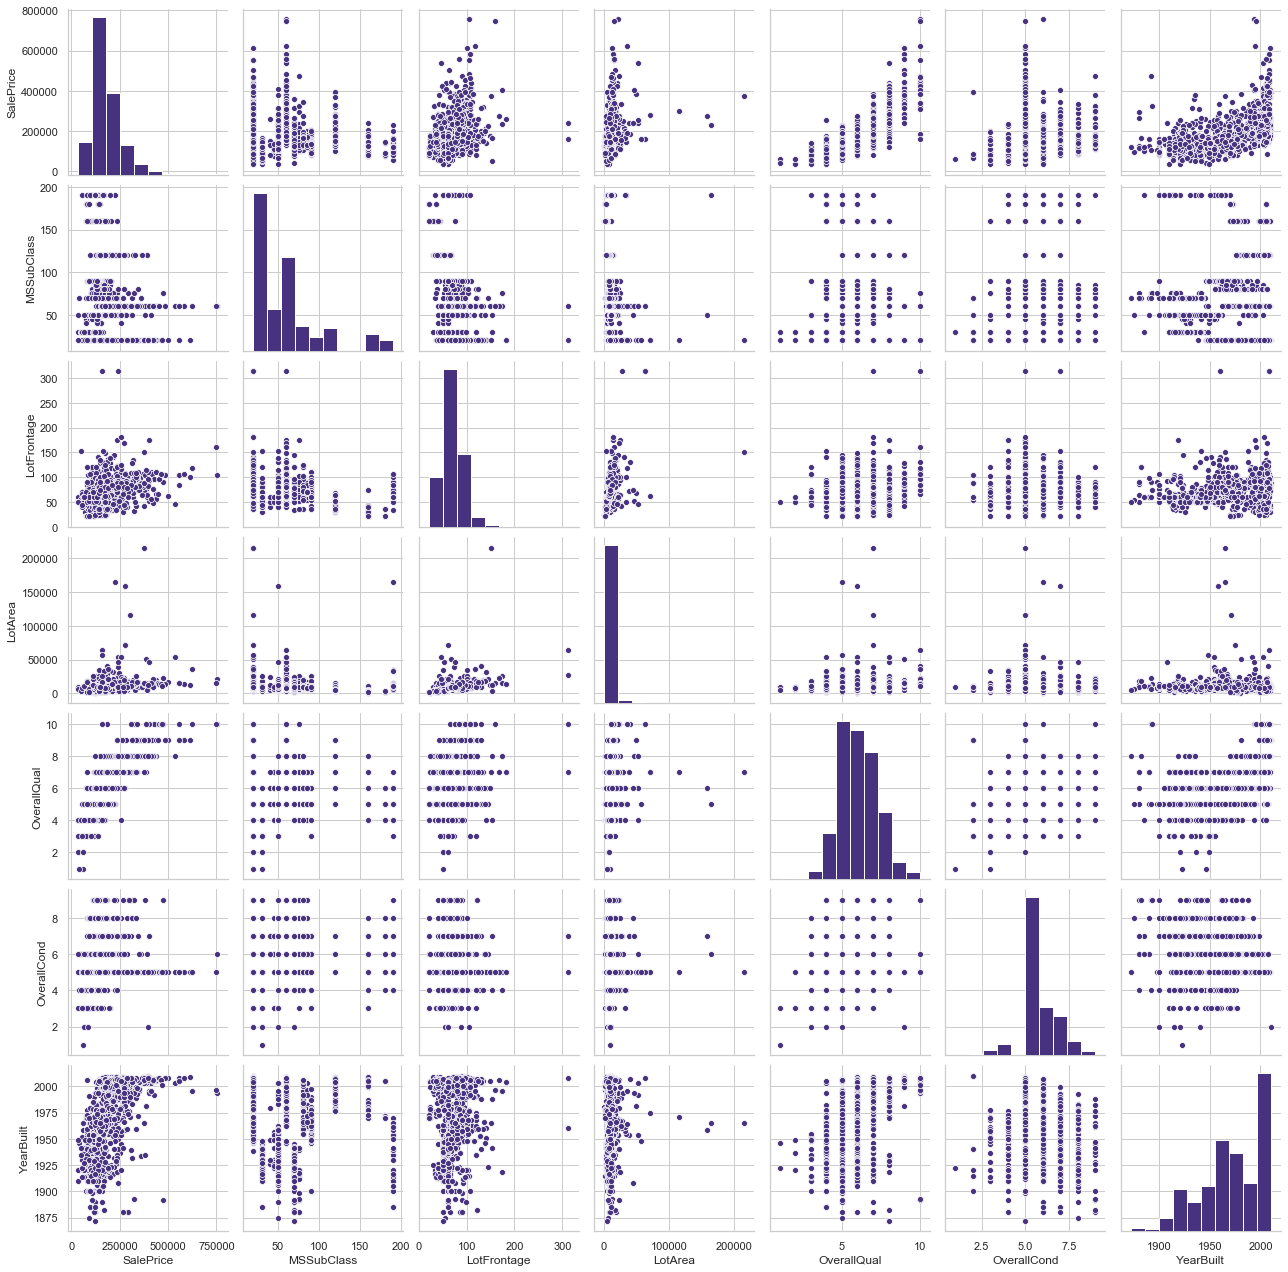

In [84]:
EDA.pair_plot_Viz(cols)

## Feature Engineering and Feature Selection

In [85]:
class Preprocessing_Data():
    def __init__(self,df_data:pd.DataFrame):
        self.df_data=df_data
    def category_to_numeric(self):
        pass
    def missing_values_treatments(self):
        '''Indentiffy missing value and fill the missing value categorical and numerical'''
        numerical_cols=[col for col in self.df_data.describe(include=['int64','float64'])]
        category_cols=[col for col in self.df_data.describe(include=['object'])]
        cat_missing_data_cols=[]
        num_missing_data_cols=[]
        drop_cols=[]
        for col in category_cols:
            if (self.df_data[col].isnull().sum()/self.df_data.shape[0])>=0.05:
                drop_cols.append(col)
            elif ((self.df_data[col].isnull().sum()/self.df_data.shape[0])<=0.05) & (self.df_data[col].isnull().sum()>0):
                cat_missing_data_cols.append(col)
                
        for col in numerical_cols:
            if(self.df_data[col].isnull().sum()/self.df_data.shape[0])>=0.05:
                drop_cols.append(col)
            elif ((self.df_data[col].isnull().sum()/self.df_data.shape[0])<=0.05) & (self.df_data[col].isnull().sum()>0):
                 num_missing_data_cols.append(col)
        #drop columns
        self.df_data.drop(drop_cols,axis=1,inplace=True)
        #forward fill
        self.df_data.loc[:,cat_missing_data_cols].fillna(method='ffill')
        self.df_data.loc[:,num_missing_data_cols].fillna(method='ffill')
        #backward fill
        self.df_data.loc[:,cat_missing_data_cols].fillna(method='bfill')
        self.df_data.loc[:,num_missing_data_cols].fillna(method='bfill')
        #Drop na
        self.df_data.dropna(inplace=True)
        return self.df_data
     
    def detect_outliers(self):
        '''detect the outliers and treatmens of outliers'''
        Q1=self.df_data.quantile(0.25)
        Q3=self.df_data.quantile(0.75)
        IQR=Q3-Q1
        df_outliers=~(self.df_data<(Q1-IQR*1.5))|(self.df_data>(Q3+IQR*1.5))
        df_outliers=df_outliers.loc[df_outliers.all(axis=1)]
        self.df_data=self.df_data.loc[df_outliers.index]
    def dummy_variables(self):
        '''create dummy variables'''
        cat_list=self.df_data.describe(include=['object']).columns.tolist()
        df_dummy=self.df_data.loc[:,cat_list]
        self.df_data=pd.get_dummies(data=self.df_data,columns=cat_list,drop_first=True)
    def __str__(self):
        return f" Data Description : {self.df_data.describe()} \n Data Shape : {self.df_data.shape} \n Data info : {self.df_data.info()}"        
       
    def scaling_data(self):
        '''Scale the data'''
        from sklearn.preprocessing import StandardScaler
        sc=StandardScaler()
        cols=self.df_data.columns.tolist()
        df_sc=sc.fit_transform(self.df_data)
        self.df_data=pd.DataFrame(data=df_sc,columns=cols)
        
    def feature_selection(self):
        '''select the features'''
        X=self.df_data.drop('SalePrice',axis=1)
        y=self.df_data.loc[:,'SalePrice']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
        X_train_sm=sm.add_constant(X_train)
        ml_sm=sm.OLS(y_train,X_train_sm).fit()
        cols_pvalues=ml_sm.pvalues
        feature_selection=[]
        for i,v in zip(cols_pvalues.index,cols_pvalues):
            if v<0.05:
                feature_selection.append(i)
        return feature_selection,ml_sm

In [86]:
#created object of class
Pre_data=Preprocessing_Data(df_data=df_house_price)

In [87]:
#check data
Pre_data.df_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [88]:
#Treatment of missing values
Pre_data.missing_values_treatments().isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [89]:
#Treatment of outliers
Pre_data.detect_outliers()

In [90]:
Pre_data.df_data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1369.000000,1369.000000,1369.00000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000
mean,728.856830,56.661797,10555.57122,6.168736,5.644266,1972.372535,1985.633309,107.458729,455.002922,48.290723,581.496713,1084.790358,1164.273923,352.935720,5.379839,1522.589481,0.430241,0.057706,1.574872,0.392988,2.881665,1.035062,6.537619,0.626735,1.788167,479.176041,96.428780,48.106647,21.506939,3.504748,15.516435,2.942294,41.814463,6.304602,2007.799123,184048.381300
std,423.291293,42.171888,10181.93928,1.330046,1.034407,29.644310,20.371440,183.654730,453.682518,164.435461,438.027400,404.243124,384.968490,437.251527,46.782520,522.960139,0.514119,0.236385,0.539774,0.504782,0.774611,0.191785,1.604160,0.643377,0.728778,209.828266,124.962296,66.987640,60.160155,29.884967,56.670562,41.485593,502.174066,2.699358,1.322256,78658.730368
min,1.000000,20.000000,1526.00000,2.000000,4.000000,1885.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,361.000000,20.000000,7577.00000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,0.000000,247.000000,815.000000,882.000000,0.000000,0.000000,1142.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,133000.000000
50%,727.000000,50.000000,9525.00000,6.000000,5.000000,1974.000000,1995.000000,0.000000,403.000000,0.000000,490.000000,1004.000000,1088.000000,0.000000,0.000000,1470.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165500.000000
75%,1097.000000,70.000000,11643.00000,7.000000,6.000000,2001.000000,2004.000000,170.000000,720.000000,0.000000,814.000000,1309.000000,1392.000000,739.000000,0.000000,1786.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,169.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,215245.00000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [91]:
#dummy variable
Pre_data.dummy_variables()


In [92]:
Pre_data.df_data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [93]:
#Scaling data
Pre_data.scaling_data()

In [94]:
Pre_data.df_data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.720146,0.079186,-0.206870,0.625217,-0.623063,1.033543,0.852813,0.482283,0.553446,-0.293783,-0.985451,-0.566179,-0.801070,1.146359,-0.115039,0.358496,1.108628,-0.244209,0.787891,1.202964,0.152822,-0.182887,0.911951,-0.974489,0.290776,0.328121,-0.771945,0.192544,-0.357625,-0.117317,-0.273901,-0.070949,-0.083297,-1.595259,0.151975,0.310971,-0.2178,-0.101647,0.511616,-0.413626,...,-0.154707,-0.097913,-0.186466,-0.200683,0.367638,-0.101647,-0.066348,-0.027037,-0.17124,-0.443484,-0.027037,-0.627769,0.230384,-0.118634,-0.03825,0.280717,-0.149682,1.189312,-0.987658,-0.046864,-0.144499,-0.147111,-0.081349,-0.027037,0.250775,-0.141842,0.273072,-0.054133,-0.03825,-0.07169,-0.060545,-0.054133,-0.307123,-0.03825,0.391571,-0.027037,-0.07169,-0.121761,0.462226,-0.311376
1,-1.717783,-0.869660,-0.093884,-0.126911,2.278208,0.122411,-0.473056,-0.585327,1.153203,-0.293783,-0.679422,0.438534,0.253948,-0.807464,-0.115039,-0.498479,-0.837156,3.987716,0.787891,-0.778814,0.152822,-0.182887,-0.335263,0.580378,0.290776,-0.091423,1.613646,-0.718405,-0.357625,-0.117317,-0.273901,-0.070949,-0.083297,-0.483477,-0.604584,-0.032410,-0.2178,-0.101647,0.511616,-0.413626,...,-0.154707,-0.097913,-0.186466,-0.200683,0.367638,-0.101647,-0.066348,-0.027037,-0.17124,-0.443484,-0.027037,-0.627769,0.230384,-0.118634,-0.03825,0.280717,-0.149682,-0.840823,1.012496,-0.046864,-0.144499,-0.147111,-0.081349,-0.027037,0.250775,-0.141842,0.273072,-0.054133,-0.03825,-0.07169,-0.060545,-0.054133,-0.307123,-0.03825,0.391571,-0.027037,-0.07169,-0.121761,0.462226,-0.311376
2,-1.715419,0.079186,0.068227,0.625217,-0.623063,0.966051,0.803707,0.297086,0.068348,-0.293783,-0.336852,-0.407801,-0.634762,1.173814,-0.115039,0.503875,1.108628,-0.244209,0.787891,1.202964,0.152822,-0.182887,-0.335263,0.580378,0.290776,0.614174,-0.771945,-0.091194,-0.357625,-0.117317,-0.273901,-0.070949,-0.083297,0.998898,0.151975,0.501738,-0.2178,-0.101647,0.511616,-0.413626,...,-0.154707,-0.097913,-0.186466,-0.200683,0.367638,-0.101647,-0.066348,-0.027037,-0.17124,-0.443484,-0.027037,-0.627769,0.230384,-0.118634,-0.03825,0.280717,-0.149682,1.189312,-0.987658,-0.046864,-0.144499,-0.147111,-0.081349,-0.027037,0.250775,-0.141842,0.273072,-0.054133,-0.03825,-0.07169,-0.060545,-0.054133,-0.307123,-0.03825,0.391571,-0.027037,-0.07169,-0.121761,0.462226,-0.311376
3,-1.713056,0.316397,-0.098796,0.625217,-0.623063,-1.936071,-0.767694,-0.585327,-0.526999,-0.293783,-0.094770,-0.813645,-0.528220,0.922150,-0.115039,0.371886,1.108628,-0.244209,-1.065412,-0.778814,0.152822,-0.182887,0.288344,0.580378,1.663437,0.776270,-0.771945,-0.195729,4.165292,-0.117317,-0.273901,-0.070949,-0.083297,-1.595259,-1.361144,-0.560198,-0.2178,-0.101647,0.511616,-0.413626,...,-0.154707,-0.097913,-0.186466,-0.200683,0.367638,-0.101647,-0.066348,-0.027037,-0.17124,2.254871,-0.027037,-0.627769,0.230384,-0.118634,-0.03825,0.280717,-0.149682,1.189312,-0.987658,-0.046864,-0.144499,-0.147111,-0.081349,-0.027037,0.

In [106]:
#feature selection
featuers,sm_ml=Pre_data.feature_selection()

In [111]:
sm_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     62.33
Date:                Sat, 27 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:12:33   Log-Likelihood:                 35.105
No. Observations:                 958   AIC:                             327.8
Df Residuals:                     759   BIC:                             1296.
Df Model:                         198                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Id                        0.0006      0.009      0.059      0.953      -0.018       0.019
MSSubClass               -0.0512      0.052     -0.977      0.329      -0.154       0.052
LotArea                   0.1349      0.017      7.713      0.000       0.101       0.169
OverallQual               0.0887      0.020      4.490      0.000       0.050       0.128
OverallCond               0.0774      0.014      5.437      0.000       0.049       0.105
YearBuilt                 0.1225      0.034      3.583      0.000       0.055       0.190
YearRemodAdd              0.0312      0.017      1.866      0.062      -0.002       0.064
MasVnrArea                0.0520      0.015      3.564      0.000       0.023       0.081
BsmtFinSF1                0.1027      0.015      6.950      0.000       0.074       0.132
BsmtFinSF2                0.0117      0.020      0.578      0.564      -0.028       0.051
BsmtUnfSF                 0.0030      0.013      0.223      0.824      -0.023       0.029
TotalBsmtSF               0.1233      0.023      5.349      0.000       0.078       0.168
1stFlrSF                  0.0900      0.026      3.398      0.001       0.038       0.142
2ndFlrSF                  0.2142      0.025      8.699      0.000       0.166       0.262
LowQualFinSF             -0.0053      0.014     -0.366      0.714      -0.034       0.023
GrLivArea                 0.2448      0.019     12.774      0.000       0.207       0.282
BsmtFullBath              0.0060      0.015      0.402      0.688      -0.023       0.035
BsmtHalfBath             -0.0134      0.011     -1.249      0.212      -0.035       0.008
FullBath                 -0.0064      0.018     -0.360      0.719      -0.041       0.029
HalfBath               5.213e-05      0.015      0.003      0.997      -0.030       0.030
BedroomAbvGr             -0.0613      0.016     -3.817      0.000      -0.093      -0.030
KitchenAbvGr             -0.0252      0.017     -1.490      0.137      -0.058       0.008
TotRmsAbvGrd              0.0346      0.022      1.564      0.118      -0.009       0.078
Fireplaces                0.0081      0.012      0.655      0.512      -0.016       0.033
GarageCars                0.0500      0.022      2.246      0.025       0.006       0.094
GarageArea                0.0114      0.022      0.521      0.602      -0.032       0.054
WoodDeckSF                0.0016      0.011      0.154      0.878      -0.019       0.023
OpenPorchSF               0.0142      0.011      1.266      0.206      -0.008       0.036
EnclosedPorch            -0.0003      0.012     -0.025      0.980      -0.023       0.023
3SsnPorch                 0.0032      0.010      0.334      0.739      -0.016       0.022
ScreenPorch               0.0288      0.010      2.849      0.005       0.009       0.049
PoolArea               

In [115]:
df_prepare=Pre_data.df_data

In [116]:
df_prepare.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.720146,0.079186,-0.206870,0.625217,-0.623063,1.033543,0.852813,0.482283,0.553446,-0.293783,-0.985451,-0.566179,-0.801070,1.146359,-0.115039,0.358496,1.108628,-0.244209,0.787891,1.202964,0.152822,-0.182887,0.911951,-0.974489,0.290776,0.328121,-0.771945,0.192544,-0.357625,-0.117317,-0.273901,-0.070949,-0.083297,-1.595259,0.151975,0.310971,-0.2178,-0.101647,0.511616,-0.413626,...,-0.154707,-0.097913,-0.186466,-0.200683,0.367638,-0.101647,-0.066348,-0.027037,-0.17124,-0.443484,-0.027037,-0.627769,0.230384,-0.118634,-0.03825,0.280717,-0.149682,1.189312,-0.987658,-0.046864,-0.144499,-0.147111,-0.081349,-0.027037,0.250775,-0.141842,0.273072,-0.054133,-0.03825,-0.07169,-0.060545,-0.054133,-0.307123,-0.03825,0.391571,-0.027037,-0.07169,-0.121761,0.462226,-0.311376
1,-1.717783,-0.869660,-0.093884,-0.126911,2.278208,0.122411,-0.473056,-0.585327,1.153203,-0.293783,-0.679422,0.438534,0.253948,-0.807464,-0.115039,-0.498479,-0.837156,3.987716,0.787891,-0.778814,0.152822,-0.182887,-0.335263,0.580378,0.290776,-0.091423,1.613646,-0.718405,-0.357625,-0.117317,-0.273901,-0.070949,-0.083297,-0.483477,-0.604584,-0.032410,-0.2178,-0.101647,0.511616,-0.413626,...,-0.154707,-0.097913,-0.186466,-0.200683,0.367638,-0.101647,-0.066348,-0.027037,-0.17124,-0.443484,-0.027037,-0.627769,0.230384,-0.118634,-0.03825,0.280717,-0.149682,-0.840823,1.012496,-0.046864,-0.144499,-0.147111,-0.081349,-0.027037,0.250775,-0.141842,0.273072,-0.054133,-0.03825,-0.07169,-0.060545,-0.054133,-0.307123,-0.03825,0.391571,-0.027037,-0.07169,-0.121761,0.462226,-0.311376
2,-1.715419,0.079186,0.068227,0.625217,-0.623063,0.966051,0.803707,0.297086,0.068348,-0.293783,-0.336852,-0.407801,-0.634762,1.173814,-0.115039,0.503875,1.108628,-0.244209,0.787891,1.202964,0.152822,-0.182887,-0.335263,0.580378,0.290776,0.614174,-0.771945,-0.091194,-0.357625,-0.117317,-0.273901,-0.070949,-0.083297,0.998898,0.151975,0.501738,-0.2178,-0.101647,0.511616,-0.413626,...,-0.154707,-0.097913,-0.186466,-0.200683,0.367638,-0.101647,-0.066348,-0.027037,-0.17124,-0.443484,-0.027037,-0.627769,0.230384,-0.118634,-0.03825,0.280717,-0.149682,1.189312,-0.987658,-0.046864,-0.144499,-0.147111,-0.081349,-0.027037,0.250775,-0.141842,0.273072,-0.054133,-0.03825,-0.07169,-0.060545,-0.054133,-0.307123,-0.03825,0.391571,-0.027037,-0.07169,-0.121761,0.462226,-0.311376
3,-1.713056,0.316397,-0.098796,0.625217,-0.623063,-1.936071,-0.767694,-0.585327,-0.526999,-0.293783,-0.094770,-0.813645,-0.528220,0.922150,-0.115039,0.371886,1.108628,-0.244209,-1.065412,-0.778814,0.152822,-0.182887,0.288344,0.580378,1.663437,0.776270,-0.771945,-0.195729,4.165292,-0.117317,-0.273901,-0.070949,-0.083297,-1.595259,-1.361144,-0.560198,-0.2178,-0.101647,0.511616,-0.413626,...,-0.154707,-0.097913,-0.186466,-0.200683,0.367638,-0.101647,-0.066348,-0.027037,-0.17124,2.254871,-0.027037,-0.627769,0.230384,-0.118634,-0.03825,0.280717,-0.149682,1.189312,-0.987658,-0.046864,-0.144499,-0.147111,-0.081349,-0.027037,0.

In [112]:
df_prepare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LotArea               1369 non-null   float64
 1   OverallQual           1369 non-null   float64
 2   OverallCond           1369 non-null   float64
 3   YearBuilt             1369 non-null   float64
 4   MasVnrArea            1369 non-null   float64
 5   BsmtFinSF1            1369 non-null   float64
 6   TotalBsmtSF           1369 non-null   float64
 7   1stFlrSF              1369 non-null   float64
 8   2ndFlrSF              1369 non-null   float64
 9   GrLivArea             1369 non-null   float64
 10  BedroomAbvGr          1369 non-null   float64
 11  GarageCars            1369 non-null   float64
 12  ScreenPorch           1369 non-null   float64
 13  MSZoning_FV           1369 non-null   float64
 14  LotConfig_CulDSac     1369 non-null   float64
 15  LandSlope_Sev        

## Model Building

In [117]:
class ModelBuilding():
    def __init__(self,X,y):
        self.X=X
        self.y=y
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
        self.X_train=X_train
        self.X_test=X_test
        self.y_train=y_train
        self.y_test=y_test       
    def Model_linear(self):      
        lr=LinearRegression()
        lr.fit(self.X_train,self.y_train)
        y_pred=lr.predict(self.X_test)
        return self.y_test,y_pred
    def DT_Regression(self,features):
        from sklearn.tree import DecisionTreeRegressor
        from IPython.display import Image
        from sklearn.externals.six import StringIO
        from sklearn.tree import export_graphviz
        import pydotplus,graphviz
        
        dt_reg=DecisionTreeRegressor()
        dt_reg.fit(self.X_train,self.y_train)
        y_pred=dt_reg.predict(self.X_test)
        
        #visualize the tree
        dot_data=StringIO()
        export_graphviz(dt_reg,out_file=dot_data,feature_names=features,filled=True,rounded=True)
        graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
        Image(graph.create_png())
        return self.y_test,y_pred,dt_reg
        
    def modle_evaluation(self,y_test,y_pred):
        print("Mean Squire error: ",mean_squared_error(y_test,y_pred))
        print("Mean absolute error",mean_absolute_error(y_test,y_pred))

In [127]:
#Split data into X and y
X=df_prepare.loc[:,cols_feature]
y=df_prepare.loc[:,'SalePrice']

In [128]:
X.head()

,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr
0,-0.206870,0.625217,-0.623063,1.033543,0.482283,0.553446,-0.566179,-0.801070,1.146359,0.358496,0.152822
1,-0.093884,-0.126911,2.278208,0.122411,-0.585327,1.153203,0.438534,0.253948,-0.807464,-0.498479,0.152822
2,0.068227,0.625217,-0.623063,0.966051,0.297086,0.068348,-0.407801,-0.634762,1.173814,0.503875,0.152822
3,-0.098796,0.625217,-0.623063,-1.936071,-0.585327,-0.526999,-0.813645,-0.528220,0.922150,0.371886,0.152822
4,0.363956,1.377346,-0.623063,0.932306,1.321120,0.440992,0.148999,-0.050085,1.601641,1.291986,1.444265


In [129]:
y.head()

0    0.310971
1   -0.032410
2    0.501738
3   -0.560198
4    0.838759
Name: SalePrice, dtype: float64

In [130]:
#Model building
ml=ModelBuilding(X,y)

In [124]:
featuers

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BedroomAbvGr',
 'GarageCars',
 'ScreenPorch',
 'MSZoning_FV',
 'LotConfig_CulDSac',
 'LandSlope_Sev',
 'Neighborhood_Edwards',
 'Neighborhood_Mitchel',
 'Neighborhood_StoneBr',
 'Condition1_RRAe',
 'HouseStyle_SLvl',
 'RoofMatl_Metal',
 'RoofMatl_WdShngl',
 'ExterQual_Gd',
 'ExterQual_TA',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtExposure_Gd',
 'BsmtFinType1_GLQ',
 'BsmtFinType2_BLQ',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Functional_Sev',
 'SaleType_CWD']

In [125]:
cols_feature=['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BedroomAbvGr']

In [131]:
y_test,y_pred,dt_reg=ml.DT_Regression(cols_feature)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.525238 to fit



In [ ]:
df_prediction=pd.DataFrame(data={'Actual':y_test,'Prediction':y_pred})
df_prediction.head()

In [ ]:
dt_reg.get_depth

In [ ]:
#train model
y_test,y_pred=ml.Model_linear()

In [ ]:
df_prediction=pd.DataFrame(data={'Actual':y_test,'Prediction':y_pred})

In [ ]:
df_prediction.head()

In [ ]:
#evaluate model
ml.modle_evaluation(y_test,y_pred)